In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df=pd.read_csv('CaliforniaHousingDataset.csv')

In [124]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [125]:
df.shape

(20640, 10)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [127]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [128]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [129]:
X=df.iloc[:,:-2]
y=df[['median_house_value']]

In [130]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [131]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [133]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [134]:
X_train_scaled,X_test_scaled

(array([[ 0.78093406, -0.80568191,  0.50935748, ..., -0.18411678,
         -0.24350772,  0.13350629],
        [ 1.24526986, -1.33947268, -0.67987313, ..., -0.37619075,
         -0.01326659, -0.53221805],
        [-0.27755183, -0.49664515, -0.36274497, ..., -0.61124018,
         -0.56532203,  0.1709897 ],
        ...,
        [ 0.60119118, -0.75885816,  0.58863952, ...,  0.28773617,
          0.06784108, -0.49478713],
        [-1.18625198,  0.90338501, -1.07628333, ...,  0.30615422,
          0.15156512,  0.96717102],
        [-1.41592345,  0.99235014,  1.85715216, ...,  1.0446304 ,
          1.93855026, -0.68320166]], shape=(14448, 8)),
 array([[ 0.28664112,  0.19166399, -0.28346293, ..., -0.03151006,
         -0.37171017, -1.1526893 ],
        [ 0.06196251, -0.23911452,  0.11294728, ...,  0.1202196 ,
          0.21697454, -0.70640568],
        [-1.42590916,  1.00639726,  1.85715216, ..., -0.10342817,
          1.20858122, -0.20830675],
        ...,
        [ 0.8358555 , -0.92742367, -

<Axes: >

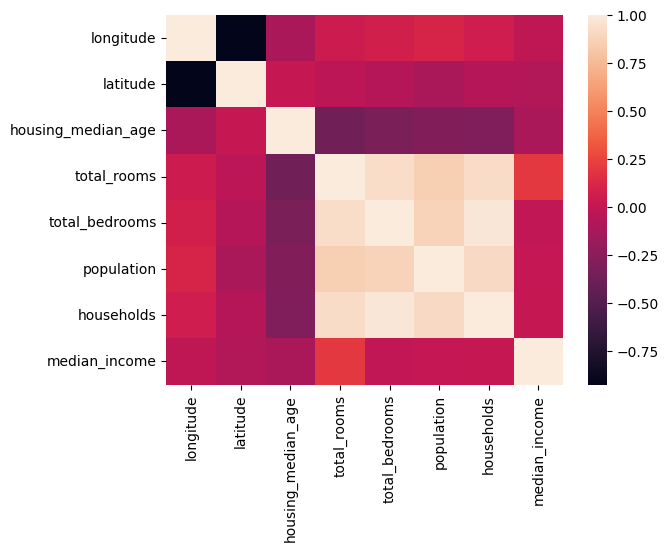

In [135]:
sns.heatmap(X.corr())

In [136]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

regression.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [137]:
y_pred=regression.predict(X_test_scaled)

In [138]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('MAE: ',mae)
print('MSE: ',mse)
print('R2 Score: ',score)

MAE:  51048.95198217244
MSE:  4856976755.912794
R2 Score:  0.6299559360511684
